In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
df = pd.read_csv('./input/nyc-rolling-sales.csv').drop('Unnamed: 0',axis=1)

In [243]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_').str.replace('-','_')

# 1.0 - Exporatory Data Analysis

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
borough                           84548 non-null int64
neighborhood                      84548 non-null object
building_class_category           84548 non-null object
tax_class_at_present              84548 non-null object
block                             84548 non-null int64
lot                               84548 non-null int64
ease_ment                         84548 non-null object
building_class_at_present         84548 non-null object
address                           84548 non-null object
apartment_number                  84548 non-null object
zip_code                          84548 non-null int64
residential_units                 84548 non-null int64
commercial_units                  84548 non-null int64
total_units                       84548 non-null int64
land_square_feet                  84548 non-null object
gross_square_feet                 84548 non-null object
ye

In [245]:
df.head(2)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


In [246]:
df['ease_ment'].value_counts()
## No values on this column, delete this
df.drop('ease_ment',axis=1,inplace=True)

In [247]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

In [248]:
bbl = (df.borough.astype(str)+df.block.astype(str)+df.lot.astype(str)).astype('int32')
df['bbl'] = bbl

In [249]:
## Checking Duplicated Values
df.duplicated().sum()

765

In [251]:
df.drop_duplicates(keep='last',inplace=True)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 21 columns):
borough                           83783 non-null int64
neighborhood                      83783 non-null object
building_class_category           83783 non-null object
tax_class_at_present              83783 non-null object
block                             83783 non-null int64
lot                               83783 non-null int64
building_class_at_present         83783 non-null object
address                           83783 non-null object
apartment_number                  83783 non-null object
zip_code                          83783 non-null int64
residential_units                 83783 non-null int64
commercial_units                  83783 non-null int64
total_units                       83783 non-null int64
land_square_feet                  83783 non-null object
gross_square_feet                 83783 non-null object
year_built                        83783 non-null int64
tax

In [253]:
## Change dtypes
df.sale_date = pd.to_datetime(df.sale_date, errors='coerce')
df.sale_price = pd.to_numeric(df.sale_price, errors='coerce')
df.tax_class_at_present = df.tax_class_at_present.astype('category')
df.tax_class_at_time_of_sale = df.tax_class_at_time_of_sale.astype('category')
df.gross_square_feet = pd.to_numeric(df.gross_square_feet, errors='coerce')
df.land_square_feet = pd.to_numeric(df.land_square_feet, errors = 'coerce')

In [254]:
print('Percentage of NaN values in each column:\n\n',(df.isnull().sum()/len(df))*100)

Percentage of NaN values in each column:

 borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
building_class_at_present          0.000000
address                            0.000000
apartment_number                   0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.097001
gross_square_feet                 32.685628
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        16.919900
sale_date                          0.000000
bbl                                0.000000
dtype: float64


**More than 30% NULL values on land_square_feet, gross_square_feet and more than 16% on sale_price**  

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

In [255]:
miss = df.isnull().sum()/len(df)
miss = miss[miss>0]
miss = miss.to_frame()
miss.reset_index(inplace=True)
miss.columns = ['name','value']

In [256]:
miss_names = list(miss.name.values)

In [257]:
for name in miss_names:
    print(name,'mean:',df[name].mean())
print()
for name in miss_names:
    print(name,'median:',df[name].median())   

land_square_feet mean: 3854.4811793032964
gross_square_feet mean: 3894.415812617469
sale_price mean: 1280703.0003016938

land_square_feet median: 2314.0
gross_square_feet median: 1680.0
sale_price median: 533000.0


**Fill with median or mean?**  
**Will not fill the sale_price missing values**

In [258]:
## Will fill with median now, check it later
df.land_square_feet = df.land_square_feet.fillna(df.land_square_feet.median())
df.gross_square_feet = df.gross_square_feet.fillna(df.gross_square_feet.median())

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
## Create test df with null sale price rows
df_test = df[df.sale_price.isnull()]
Xtest = df.drop('sale_price',axis=1)
ytest = df_test.sale_price

In [261]:
## Create no null DF
df_nonull = df[df.sale_price.notnull()]

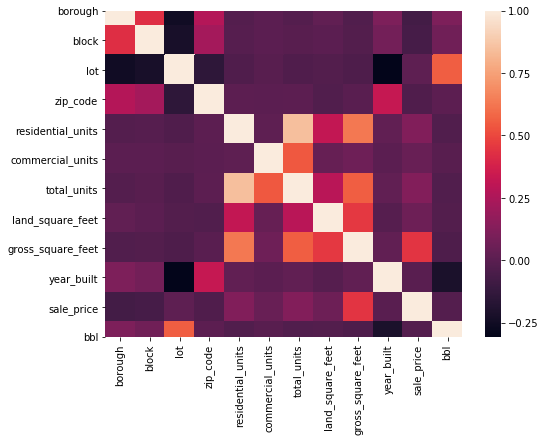

In [282]:
corr = df_nonull.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr)

**lot, residential_units, commercial_units, total_units, land_square_feet, gross_square_feet are the bigger corr values (over 0)**

In [296]:
print('Max sale value:',df_nonull.sale_price.max())

Max sale value: 2210000000.0


In [297]:
df_nonull[df_nonull['sale_price']==df_nonull.sale_price.max()]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,bbl
7447,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,O4,245 PARK AVENUE,,10167,...,35,35,81336.0,1586886.0,1966,4,O4,2.210000e+09,2017-05-05,113011


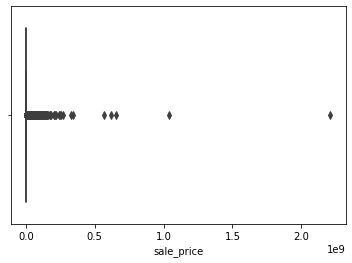

In [305]:
sns.boxplot(x='sale_price',data=df_nonull)

In [306]:
no_out = df_nonull[(df_nonull.sale_price > 100000) &  (df_nonull.sale_price < 5000000)]

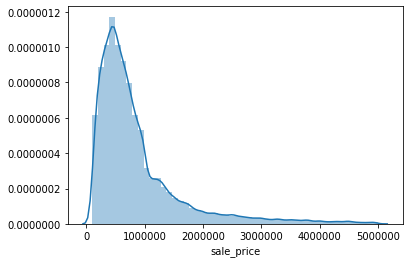

In [307]:
sns.distplot(no_out.sale_price)

In [312]:
no_out.sale_price.skew()

2.344062871488611

In [346]:
## Normalized prices with log
sales = np.log(no_out.sale_price)
sales.skew()

0.198994620445416

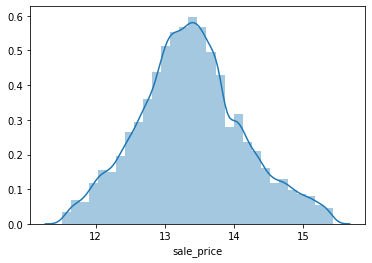

In [345]:
## Plot normalized sales prices
sns.distplot(sales, bins=30)